In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Bone Age Assessment System**

Enter the patient's gender (Male / Female):
Enter the patient's chronological age (years): 12.5


Saving 12.5YO.png to 12.5YO.png


Done!




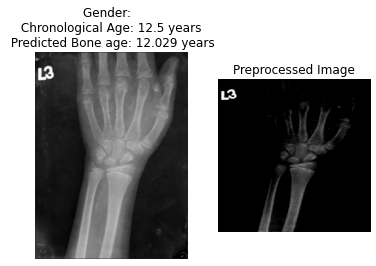

In [ ]:
import tensorflow as tf
from keras_preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img 
from google.colab import files

gender = input ("Enter the patient's gender (Male / Female):") 
ch_age = float(input("Enter the patient's chronological age (years): "))

if (ch_age>19):
  print("As chronological age is greater than 19 years, we can't predict the bone age from only hand X-Rays")
else:
  # Recreate the exact same model, including its weights and the optimizer
  new_model = tf.keras.models.load_model('/content/drive/MyDrive/BE_Project/Model/best_model.h5', compile=False)

  #Images are uploaded using this code
  uploaded = files.upload()

  #Iterating from the list of uploaded images
  for fn in uploaded.keys():
    orig_img = plt.imread(fn,1)
    img=tf.keras.preprocessing.image.load_img(fn,target_size=(256,256))

    img=tf.keras.preprocessing.image.img_to_array(img)
    img=tf.keras.applications.xception.preprocess_input(img) 

    mean_bone_age = 127.3207517246848
    std_bone_age = 41.18202139939618

    pred = mean_bone_age + std_bone_age*(new_model.predict(np.array([img])))

    print("\n")
    print("\rDone!")
    print("\n")

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
    plt.title('Gender: {} \n Chronological Age: {} years \n Predicted Bone age: {} years'.format(gender, ch_age, round(pred[0][0]/12.0,3)))
    plt.axis('off')

    img = img/np.amax(img)
    img = np.clip(img, 0, 1)

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Preprocessed Image')
    plt.axis('off')
    plt.show()